In [2]:
# ============================================
# IMPORTACIÓN DE LIBRERÍAS NECESARIAS
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE
import joblib  # Para guardar y cargar el modelo
# ============================================
# CARGA DEL DATASET ORIGINAL NO BALANCEADO
# ============================================
dataframe = pd.read_csv('ENFCeliacaSinDatosPerdidos.csv', sep=';')
clasificadores = ['Positivo', 'Negativo']  # 1 = Positivo, 0 = Negativo

In [3]:
dataframe.head(10)

,AGE,GENDER,DIABTETES,DIABETES_TYPE,DIARRHOEA,SHORT_STATURE,STICKY_STOOL,WEIGHT_LOSS,IGA,IGG,IGM,DISEASE_DIAGOSE
0,10,0,1,1,2,0,0,0,1.30,10.0,1.00,1
1,9,0,1,1,0,0,0,0,1.50,12.5,1.30,1
2,8,1,1,1,1,1,1,1,0.40,8.0,0.50,1
3,10,0,1,1,1,0,0,0,0.98,9.0,0.66,1
4,9,0,1,1,0,0,0,0,1.00,10.5,1.10,1
5,8,1,1,1,0,1,1,1,1.10,9.5,1.00,1
6,9,0,1,1,1,1,1,1,2.10,11.4,1.00,1
7,5,1,1,1,0,0,1,1,0.80,12.0,0.98,1
8,6,1,1,1,0,0,1,1,1.50,8.0,1.10,1
9,4,0,1,1,1,1,1,1,0.42,11.5,1.00,1


In [4]:
dataframe.head(10)

,AGE,GENDER,DIABTETES,DIABETES_TYPE,DIARRHOEA,SHORT_STATURE,STICKY_STOOL,WEIGHT_LOSS,IGA,IGG,IGM,DISEASE_DIAGOSE
0,10,0,1,1,2,0,0,0,1.30,10.0,1.00,1
1,9,0,1,1,0,0,0,0,1.50,12.5,1.30,1
2,8,1,1,1,1,1,1,1,0.40,8.0,0.50,1
3,10,0,1,1,1,0,0,0,0.98,9.0,0.66,1
4,9,0,1,1,0,0,0,0,1.00,10.5,1.10,1
5,8,1,1,1,0,1,1,1,1.10,9.5,1.00,1
6,9,0,1,1,1,1,1,1,2.10,11.4,1.00,1
7,5,1,1,1,0,0,1,1,0.80,12.0,0.98,1
8,6,1,1,1,0,0,1,1,1.50,8.0,1.10,1
9,4,0,1,1,1,1,1,1,0.42,11.5,1.00,1


In [5]:
dataframe.describe()

,AGE,GENDER,DIABTETES,DIABETES_TYPE,DIARRHOEA,SHORT_STATURE,STICKY_STOOL,WEIGHT_LOSS,IGA,IGG,IGM,DISEASE_DIAGOSE
count,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000
mean,12.768812,0.491387,0.829102,0.867180,0.971442,0.720762,0.825023,0.686310,1.427384,10.052901,1.236963,0.835449
std,7.434250,0.500039,0.376505,0.478131,0.819601,0.715868,0.380034,0.464097,1.110042,2.047683,0.447216,0.370859
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.340000,5.000000,0.500000,0.000000
25%,8.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,8.700000,0.980000,1.000000
50%,10.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.100000,10.000000,1.100000,1.000000
75%,15.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.800000,12.000000,1.500000,1.000000
max,35.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,9.000000,15.300000,2.700000,1.000000


In [6]:
dataframe.groupby('DISEASE_DIAGOSE').size()

DISEASE_DIAGOSE
0     363
1    1843
dtype: int64

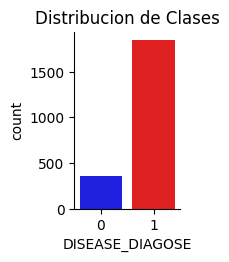

In [7]:
import seaborn as sb

#Aseguramos que los numeros son enteros
dataframe['DISEASE_DIAGOSE'] = dataframe['DISEASE_DIAGOSE'].astype(int)
sb.catplot(x='DISEASE_DIAGOSE', hue='DISEASE_DIAGOSE', data=dataframe, kind="count", height = 2.5, aspect=0.8, palette={0:"blue", 1:"red"}, legend = False)
plt.title("Distribucion de Clases")
plt.show()

In [8]:
# ============================================
# 3. SEPARAR VARIABLES X E Y PARA SMOTE
# ============================================
y = dataframe['DISEASE_DIAGOSE']
X = dataframe.drop('DISEASE_DIAGOSE', axis=1)

print("Distribución antes del balanceo:")
print(y.value_counts())

Distribución antes del balanceo:
DISEASE_DIAGOSE
1    1843
0     363
Name: count, dtype: int64


In [9]:
# ============================================
# 4. APLICAR SMOTE SOBRE TODO EL DATASET
# ============================================
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Distribución después del balanceo:")
print(y_resampled.value_counts())

Distribución después del balanceo:
DISEASE_DIAGOSE
1    1843
0    1843
Name: count, dtype: int64


In [10]:
# ============================================
# 5. GUARDAR EL DATASET BALANCEADO EN CSV
# ============================================
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['DISEASE_DIAGOSE'] = y_resampled
df_resampled.to_csv('ENFCeliacaBalanceadoS.csv', index=False, sep=';')

print("✅ Conjunto completo balanceado guardado como 'ENFCeliacaBalanceadoS.csv'")

✅ Conjunto completo balanceado guardado como 'ENFCeliacaBalanceadoS.csv'


In [11]:
# ============================================
# 6. CARGA DEL DATASET BALANCEADO PARA USO
# ============================================
df_balanceado = pd.read_csv('ENFCeliacaBalanceadoS.csv', sep=';')

# Separación de variables
Xb = df_balanceado.drop('DISEASE_DIAGOSE', axis=1)
yb = df_balanceado['DISEASE_DIAGOSE']

In [12]:
df_balanceado.groupby('DISEASE_DIAGOSE').size()

DISEASE_DIAGOSE
0    1843
1    1843
dtype: int64

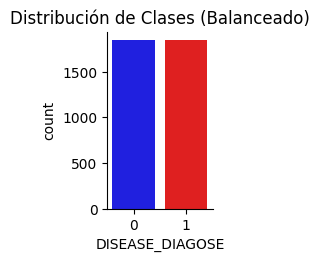

In [13]:
import seaborn as sb
import matplotlib.pyplot as plt

# Asegurar que la columna es entera
df_balanceado['DISEASE_DIAGOSE'] = df_balanceado['DISEASE_DIAGOSE'].astype(int)

# Gráfico de distribución de clases con el dataset balanceado
sb.catplot(
    x='DISEASE_DIAGOSE',
    hue='DISEASE_DIAGOSE',
    data=df_balanceado,
    kind="count",
    height=2.5,
    aspect=0.8,
    palette={0: "blue", 1: "red"},
    legend=False
)
plt.title("Distribución de Clases (Balanceado)")
plt.show()

✅ Modelo guardado como 'modelo_entrenado.pkl'
✅ Modelo cargado desde 'modelo_entrenado.pkl'
              precision    recall  f1-score   support

    Positivo       0.96      0.91      0.94       569
    Negativo       0.91      0.96      0.94       537

    accuracy                           0.94      1106
   macro avg       0.94      0.94      0.94      1106
weighted avg       0.94      0.94      0.94      1106



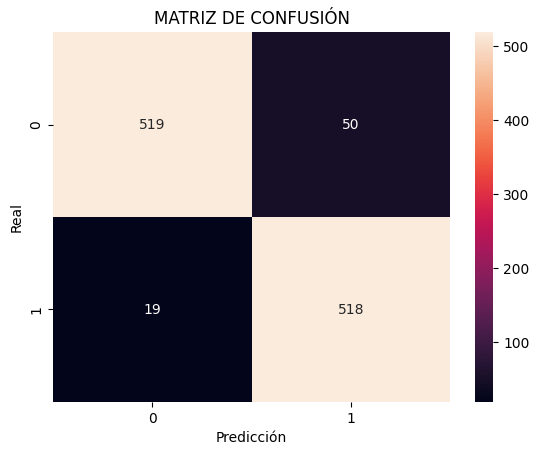

In [21]:
# División del dataset balanceado
x_train, x_test, y_train, y_test = train_test_split(Xb, yb, test_size=0.3, random_state=30)

# Entrenar el modelo
knn_mm = KNeighborsClassifier(n_neighbors=6)
knn_mm.fit(x_train, y_train)

# =============================================
# 5. GUARDAR EL MODELO ENTRENADO
# =============================================
joblib.dump(knn_mm, 'modelo_entrenado.pkl')
print("✅ Modelo guardado como 'modelo_entrenado.pkl'")

# =============================================
# 6. CARGA DEL MODELO ENTRENADO
# =============================================
modelo_cargado = joblib.load('modelo_entrenado.pkl')
print("✅ Modelo cargado desde 'modelo_entrenado.pkl'")

# Predicciones
predicciones = modelo_cargado.predict(x_test)
# Matriz de Confusión
tn, fp, fn, tp = confusion_matrix(y_test, predicciones).ravel()
sb.heatmap(confusion_matrix(y_test, predicciones), annot=True, fmt="d")
plt.title('MATRIZ DE CONFUSIÓN')
plt.xlabel('Predicción')
plt.ylabel('Real')

# Reporte de clasificación
print(classification_report(y_test, predicciones, target_names=clasificadores))

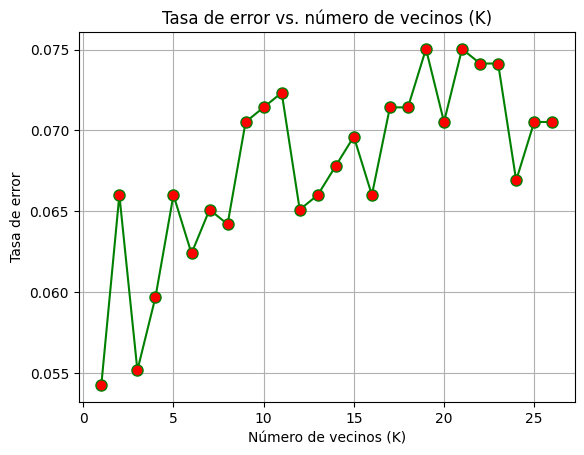

,K (número de vecinos),Tasa de error
0,1,0.054250
1,2,0.066004
2,3,0.055154
3,4,0.059675
4,5,0.066004
5,6,0.062387
6,7,0.065099
7,8,0.064195
8,9,0.070524
9,10,0.071429


In [15]:
# ============================================================
# 8. Tasa de error usando dataset balanceado
# ============================================================
tasa_error = []
valores_k = range(1, 27)

for i in valores_k:
    knn_mm = KNeighborsClassifier(n_neighbors=i)
    knn_mm.fit(x_train, y_train)
    prediction_i = knn_mm.predict(x_test)
    tasa_error.append(np.mean(prediction_i != y_test))

# Mostrar la gráfica
plt.plot(valores_k, tasa_error, color="green", marker="o", markerfacecolor="red", markersize=8)
plt.title("Tasa de error vs. número de vecinos (K)")
plt.xlabel("Número de vecinos (K)")
plt.ylabel("Tasa de error")
plt.grid(True)
plt.show()

# Mostrar la tabla con los valores exactos
tabla_resultados = pd.DataFrame({
    'K (número de vecinos)': list(valores_k),
    'Tasa de error': tasa_error
})

display(tabla_resultados)

              precision    recall  f1-score   support

    Positivo       0.98      0.92      0.95       569
    Negativo       0.92      0.98      0.95       537

    accuracy                           0.95      1106
   macro avg       0.95      0.95      0.95      1106
weighted avg       0.95      0.95      0.95      1106



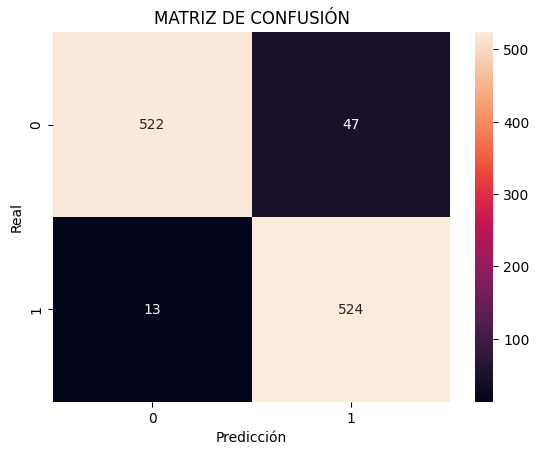

In [16]:
knn_mm = KNeighborsClassifier(n_neighbors=1)

#Entrenar el algoritmo
knn_mm.fit(x_train,y_train)

predicciones = knn_mm.predict(x_test)

sb.heatmap(confusion_matrix(y_test,predicciones), annot = True, fmt = "d")
plt.title('MATRIZ DE CONFUSIÓN')
plt.xlabel('Predicción')
plt.ylabel('Real')

print(classification_report(y_test,predicciones,target_names=clasificadores))

In [17]:
labels = ['Si_tiene', 'No_tiene']
matriz = confusion_matrix(y_test, predicciones, labels=[0, 1])
print(pd.DataFrame(matriz, index=labels, columns=labels))

print(classification_report(y_test, predicciones, target_names=clasificadores))

          Si_tiene  No_tiene
Si_tiene       522        47
No_tiene        13       524
              precision    recall  f1-score   support

    Positivo       0.98      0.92      0.95       569
    Negativo       0.92      0.98      0.95       537

    accuracy                           0.95      1106
   macro avg       0.95      0.95      0.95      1106
weighted avg       0.95      0.95      0.95      1106



              precision    recall  f1-score   support

    Positivo       0.93      0.94      0.94       569
    Negativo       0.94      0.93      0.93       537

    accuracy                           0.93      1106
   macro avg       0.93      0.93      0.93      1106
weighted avg       0.93      0.93      0.93      1106



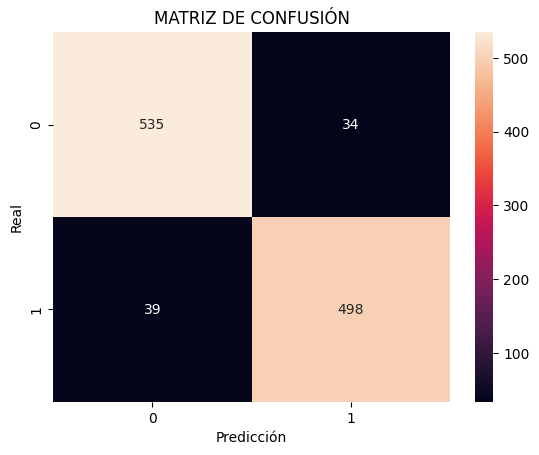

In [18]:
knn_mm = KNeighborsClassifier(n_neighbors=2)

#Entrenar el algoritmo
knn_mm.fit(x_train,y_train)

predicciones = knn_mm.predict(x_test)

sb.heatmap(confusion_matrix(y_test,predicciones), annot = True, fmt = "d")
plt.title('MATRIZ DE CONFUSIÓN')
plt.xlabel('Predicción')
plt.ylabel('Real')

print(classification_report(y_test,predicciones,target_names=clasificadores))

In [19]:
# Conjunto de entrada sin nombres de columna: funciona, pero puede lanzar advertencia
print(knn_mm.predict([[9, 0, 1, 1, 0, 0, 0, 0, 1.50, 12.5, 1.30]]))
print(knn_mm.predict_proba([[9, 0, 1, 1, 0, 0, 0, 0, 1.50, 12.5, 1.30]]))

[1]
[[0. 1.]]


C:\Users\CESAR\capgit\FormularioCancerDeMama\TP3-2025-1\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\CESAR\capgit\FormularioCancerDeMama\TP3-2025-1\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [20]:
print(knn_mm.predict(pd.DataFrame([[15, 0, 0, 0, 0, 0, 0, 0, 0.02,2, 0.20]], columns=Xb.columns)))
print(knn_mm.predict_proba(pd.DataFrame([[15, 0, 0, 0, 0, 0, 0, 0, 0.02, 2, 0.20]], columns=Xb.columns)))

[1]
[[0. 1.]]
